In [1]:
import numpy as np
from gwpy.timeseries import TimeSeries
import h5py
import matplotlib.pyplot as plt

filename = "../L-L1_GWOSC_16KHZ_R1-1266618157-32.hdf5"

with h5py.File(filename, "r") as f:
    strain_data = f["strain/Strain"][:]

In [2]:
CHUNK_SIZE = 4096
FS = 16384
fft_chunk = []

#splitting the data into 4096-element chunks and putting them into FFT to generate a raw spectrogram
for s in range(0, len(strain_data)-CHUNK_SIZE, CHUNK_SIZE):
    chunk = strain_data[s:s+CHUNK_SIZE] * np.hanning(CHUNK_SIZE)
    fft_chunk.append(10 * np.log10(np.abs(np.fft.fftshift(np.fft.fft(chunk)))))

spectro_data = np.array(fft_chunk).T

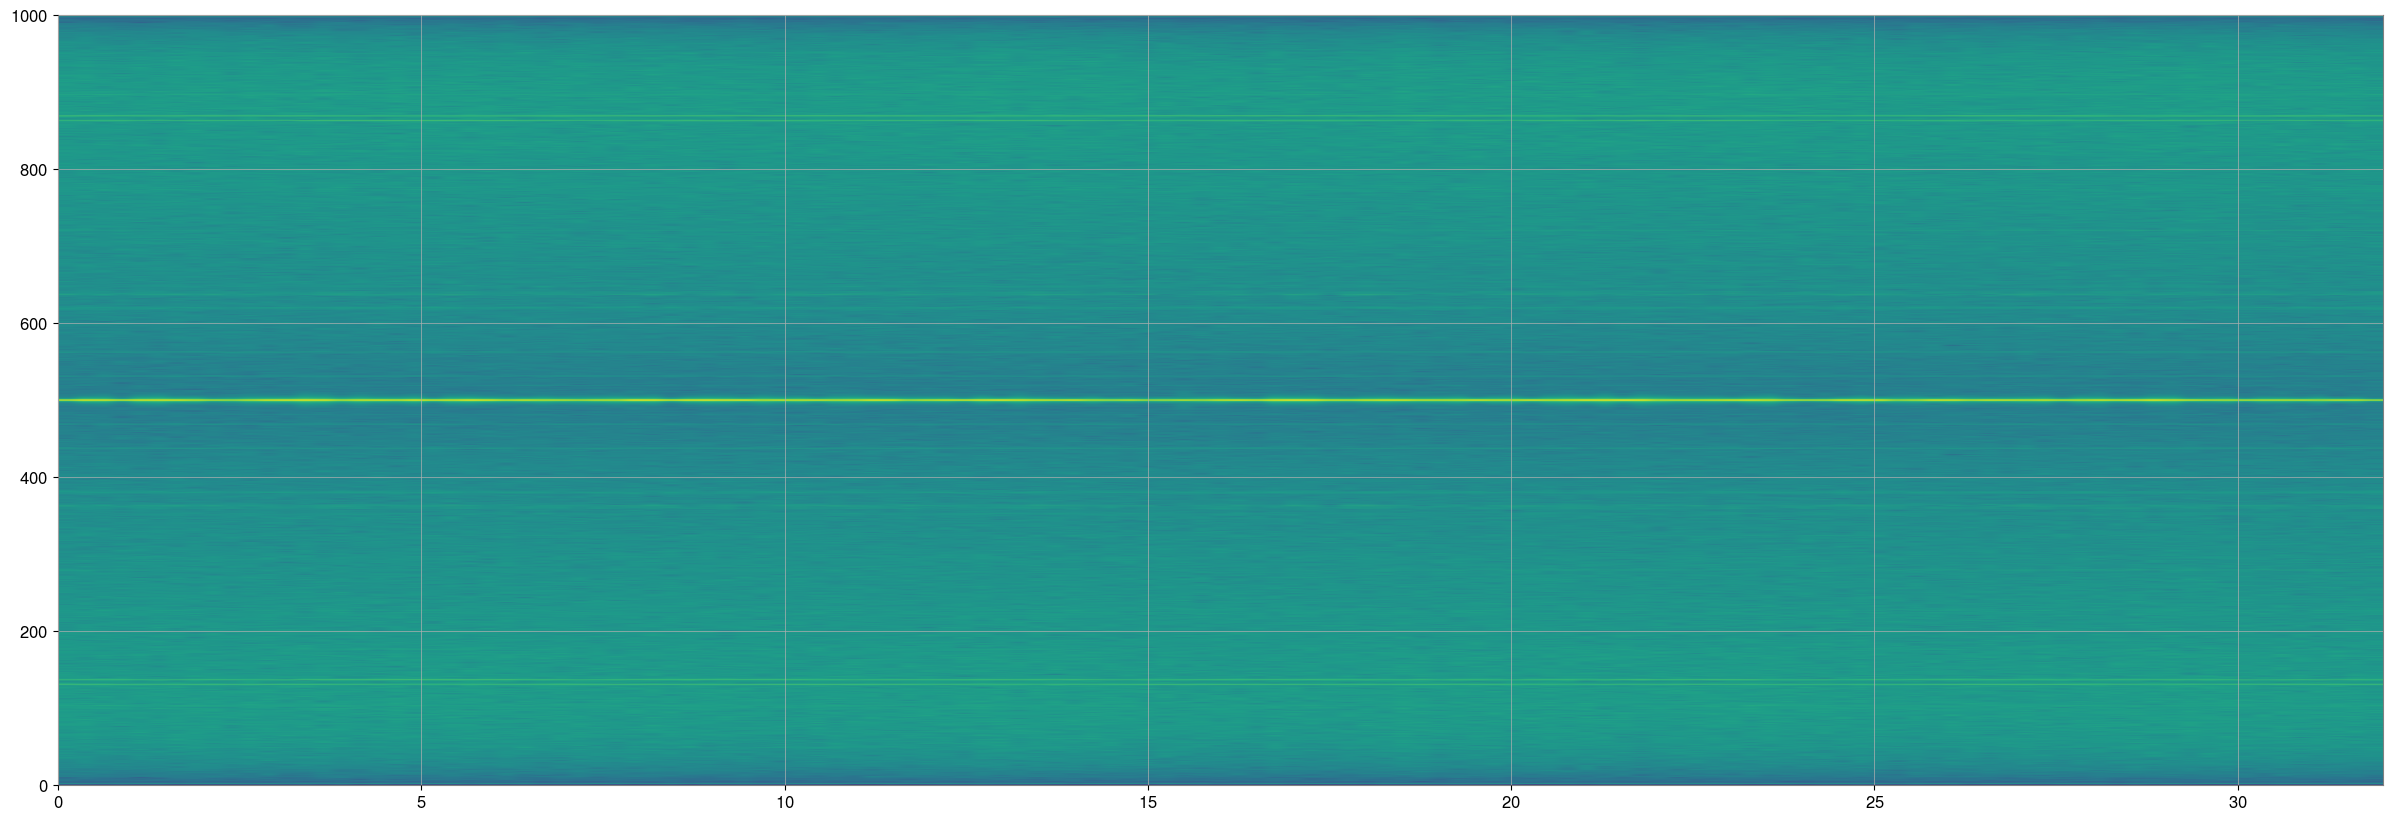

In [3]:
plt.figure(figsize=(30,10))
plt.imshow(spectro_data, extent=(0,32,0,1000), aspect="auto")

#There is nothing of note in this spectrogram
#I learned that it would be better to do some processing on the data before visualizing
#In the next code blocks i will try to extract the merger event from the data